# Simple Linear Regression by Prabhat
## Objectives
* Using scikit-learn to implement simple linear regression
*  Creating model, train, test and using model

Importing necessary packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
df = pd.read_csv("F:\Study\IBM_Machine_Learning\CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration

In [8]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
cdf = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
cdf.head(16)

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


Visualizing the features

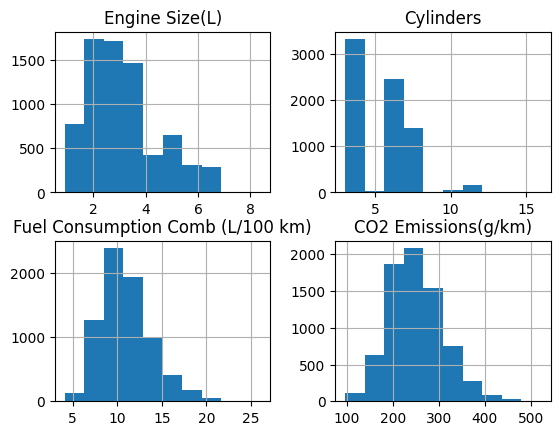

In [10]:
dis = cdf[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
dis.hist()
plt.show()
#histogram is often used to illustrate the major features of the distribution of data

Plotting the each features against CO2 Emission

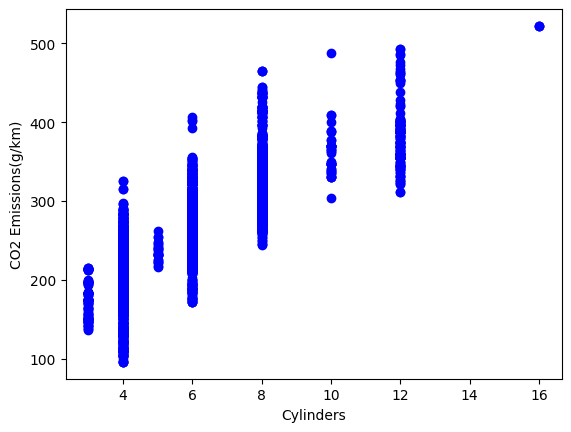

In [11]:
plt.scatter(cdf.Cylinders, cdf['CO2 Emissions(g/km)'], color='blue')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()


In pandas DataFrames, you can access columns using two main methods:

Dot notation: cdf.Cylinders - This is a convenient way to access a column when the column name does not contain spaces or special characters. It's similar to accessing attributes of an object.

Bracket notation: cdf['Fuel Consumption Comb (L/100 km)'] - This method is used when the column name contains spaces or special characters. It's also more versatile and allows you to select columns based on dynamic or complex conditions.

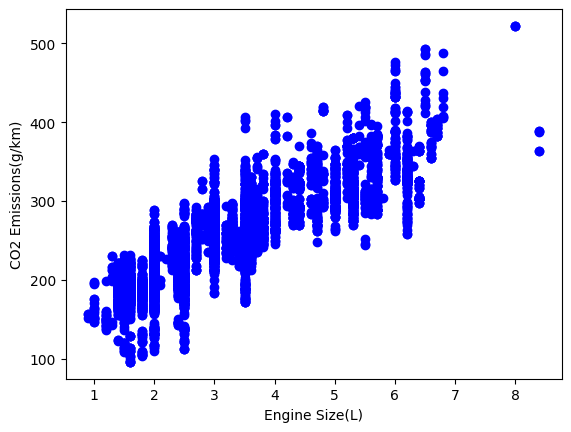

In [12]:
plt.scatter(cdf['Engine Size(L)'], cdf['CO2 Emissions(g/km)'], color='blue')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()


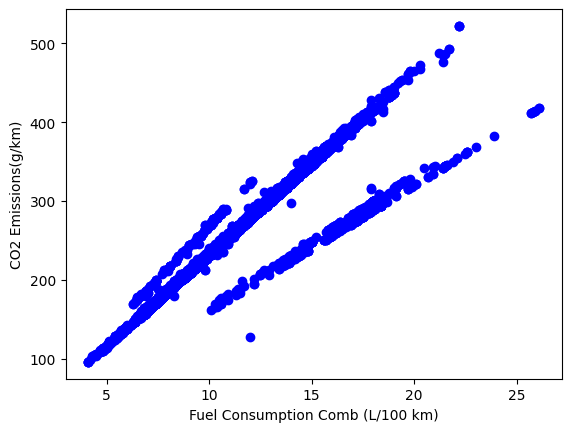

In [13]:
plt.scatter(cdf['Fuel Consumption Comb (L/100 km)'], cdf['CO2 Emissions(g/km)'], color='blue')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()


#### Creating Train and Test Dataset
Training with train set and testing with test set will provide more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model.
Let's split our dataset into test and train set.
80 % of the dataset will be used for training and remaining 20% will be used for testing.

In [14]:
split = np.random.rand(len(df)) < 0.8 
train = cdf[split]
test = cdf[~split]

"np.random.rand" generates an array of random numbers between 0 and 1. The length of the array is the same as the no. of rows in df.
< 0.8: This creates a boolean mask by comparing each random number in the array to 0.8. If a random number is less than 0.8, the corresponding element in the boolean mask will be True; otherwise, it will be False.
The resulting "split" boolean mask can be used to split the DataFrame into two subsets. 
Generating random numbers between 0 and 1 to split a DataFrame, each generated number corresponds to a row in the DataFrame. Numbers between 0 and 1 is used because  numbers between 0 and 1 are intuitively interpretable as probabilities.

#### Train data distribution
Let's take the feature 'Engine Size' and target 'CO2 Emission'

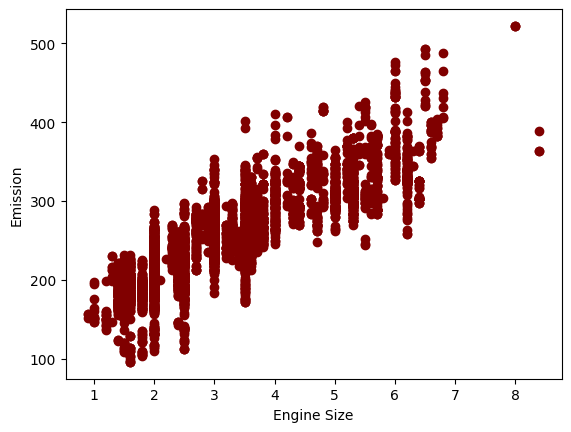

In [17]:
plt.scatter(train['Engine Size(L)'],train['CO2 Emissions(g/km)'], color = 'maroon')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

#### Modeling the data

In [24]:

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine Size(L)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit(train_x, train_y)
print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_)


Coefficient:  [[36.94503854]]
Intercept:  [134.40192488]


#### Plotting the fit line over the data

Text(0, 0.5, 'CO2 Emission(g/km)')

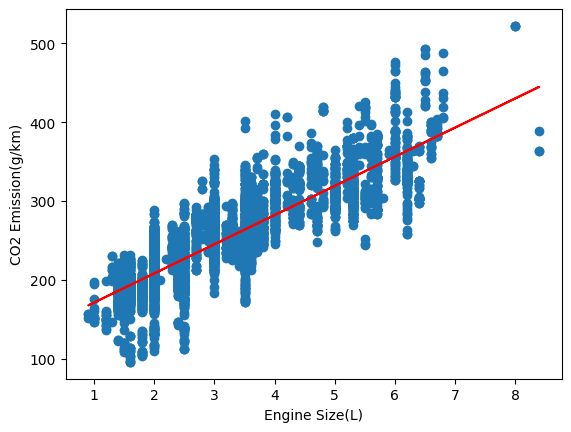

In [28]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'])
plt.plot(train_x, regr.coef_[0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emission(g/km)')


#### Evaluating the model using Evaluation Metric
Lets use MSE for calculating the accuracy of our model based on test set.

In [29]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine Size(L)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.82
Residual sum of squares (MSE): 986.46
R2-score: 0.72


#### Lets see what the evaluation metrics are if we trained a regression model using another feature.
Lets take 'Fuel Consumption Comb (L/100 km)' as a feature.

In [30]:
train_x = np.asanyarray(train[['Fuel Consumption Comb (L/100 km)']])

test_x = np.asanyarray(test[['Fuel Consumption Comb (L/100 km)']])

Training the Linear Regression Model

In [31]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

Predicting target using the predict funcion for test_x

In [33]:
predictions = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions- test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predictions) )

Mean absolute error: 13.88
Residual sum of squares (MSE): 502.07
R2-score: 0.86


When training the model using the feature ' Fuel Consumption', we got the less MAE and increased R2 score.

#### Significance of the Result
* A low MAE suggests that the model's prediction are close to the actual values on average. It indicates good accuracy in terms of prediction error.
* A high R2 score suggests that the model is able to explain a larger proportion of the variance in the target variable, indicating a better fit to the data.